In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from urllib.request import urlopen
from PIL import Image
%matplotlib inline
plt.style.use('default')

In [4]:
model_vgg=tf.keras.applications.vgg16.VGG16(include_top=True, weights='imagenet')


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 113s 0us/step


In [5]:
model_vgg.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
def preprocess_input(img):
 x=np.zeros((224,224,3),dtype="float32")
 x[:,:,0]=img[:,:,2]
 x[:,:,1]=img[:,:,1]
 x[:,:,2]=img[:,:,0]
 mean = [103.939, 116.779, 123.68]
 x[:,:, 0] = x[:,:, 0]-mean[0]
 x[:,:, 1] = x[:,:, 1]-mean[1]
 x[:,:, 2] = x[:,:, 2]-mean[2]
 return x
def undo_preprocess_input(img):
 mean = [103.939, 116.779, 123.68]
 img[:,:, 0] = img[:,:, 0]+mean[0]
 img[:,:, 1] = img[:,:, 1]+mean[1]
 img[:,:, 2] = img[:,:, 2]+mean[2]
 x=np.zeros((224,224,3),dtype="float32")
 x[:,:,0]=img[:,:,2]
 x[:,:,1]=img[:,:,1]
 x[:,:,2]=img[:,:,0]
 return x


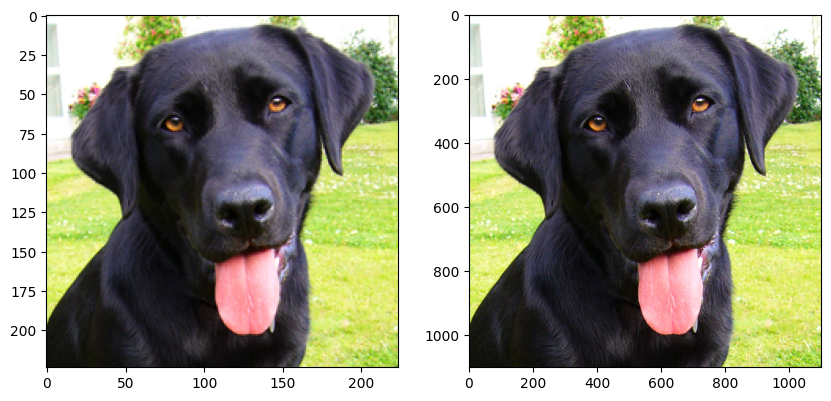

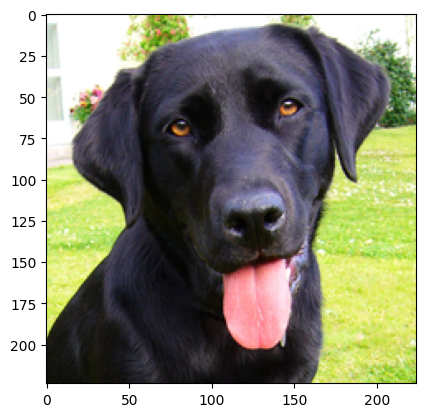

In [21]:
img1 = (Image.open(urlopen("https://upload.wikimedia.org/wikipedia/commons/4/4a/Black_Labrador_Retriever_portrait.jpg")))
plt.imshow(img1)
plt.show()
new_width = 224
new_height = 224
# Replacing Image.ANTIALIAS with Image.Resampling.LANCZOS
img1 = img1.resize((new_width, new_height), Image.Resampling.LANCZOS)
plt.imshow(img1)
plt.show()
img1=np.array(img1)

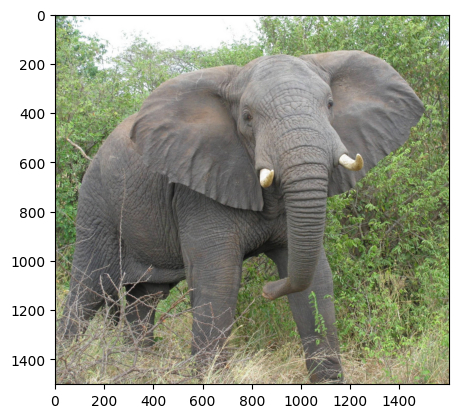

In [22]:
img2 = (Image.open(urlopen("https://th.bing.com/th/id/R.dbfd4b04509e1da99118128b4fb1ac51?rik=GVkFlAH0EqtfHw&riu=http%3a%2f%2f4.bp.blogspot.com%2f-Dik2j_4eNQk%2fUXZqNT3mi_I%2fAAAAAAAAAMQ%2fuOLig_wWvRg%2fs1600%2fElephant-Lovely-Animal.JPG&ehk=IJ31qitf%2bVwZkA4EFPbwvem4I963M9Rwa2ldREtaV60%3d&risl=&pid=ImgRaw&r=0")))
plt.imshow(img2)
plt.show()
new_width = 224
new_height = 224

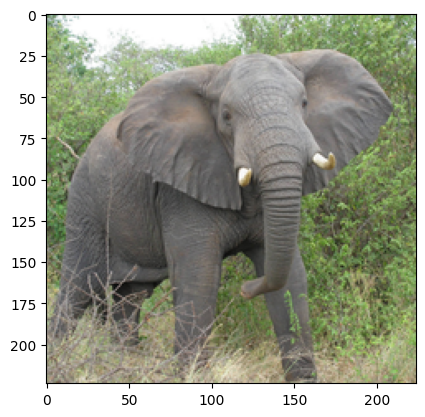

In [23]:
img2 = img2.resize((new_width, new_height), Image.Resampling.LANCZOS)
plt.imshow(img2)
plt.show()
img2=np.array(img2)

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)


In [29]:
img1=preprocess_input(img1)
print(img1.shape)
img2=preprocess_input(img2)
print(img2.shape)


(224, 224, 3)
(224, 224, 3)


In [31]:
pred1=model_vgg.predict(np.expand_dims(img1,axis=0))
tf.keras.applications.vgg16.decode_predictions(pred1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 1s 25us/step


[[('n02099712', 'Labrador_retriever', 0.9380027),
  ('n02099267', 'flat-coated_retriever', 0.043381866),
  ('n02099429', 'curly-coated_retriever', 0.006543962),
  ('n04254680', 'soccer_ball', 0.0051678363),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.0018108576)]]

In [33]:
pred2=model_vgg.predict(np.expand_dims(img2,axis=0))
tf.keras.applications.vgg16.decode_predictions(pred2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step


[[('n02504458', 'African_elephant', 0.61729634),
  ('n01871265', 'tusker', 0.3662707),
  ('n02504013', 'Indian_elephant', 0.016427688),
  ('n01704323', 'triceratops', 4.878302e-06),
  ('n02408429', 'water_buffalo', 1.12247136e-07)]]